<a href="https://colab.research.google.com/github/immiesp/DADS5001_miniproject/blob/main/Mini_Project_DADS5001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Auto Run

In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import IPython
from IPython.display import display, Markdown, Latex, HTML, IFrame, JSON, Code, Image, YouTubeVideo, clear_output

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )

from google.colab import drive
drive.mount('/content/drive')
import requests
import os

Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Pandas 2.2.2
NumPy 2.0.2
IPython 7.34.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
plt.style.use('ggplot')

# 2. Data Prep

##Thailand GHG Emission

In [6]:
df_ghg = pd.read_csv('GHG_emissions_sector.csv')
df_ghg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    6 non-null      object 
 1   1990    6 non-null      float64
 2   1991    6 non-null      float64
 3   1992    6 non-null      float64
 4   1993    6 non-null      float64
 5   1994    6 non-null      float64
 6   1995    6 non-null      float64
 7   1996    6 non-null      float64
 8   1997    6 non-null      float64
 9   1998    6 non-null      float64
 10  1999    6 non-null      float64
 11  2000    6 non-null      float64
 12  2001    6 non-null      float64
 13  2002    6 non-null      float64
 14  2003    6 non-null      float64
 15  2004    6 non-null      float64
 16  2005    6 non-null      float64
 17  2006    6 non-null      float64
 18  2007    6 non-null      float64
 19  2008    6 non-null      float64
 20  2009    6 non-null      float64
 21  2010    6 non-null      float64
 22  2011  

In [7]:
display(df_ghg.head(10))

,Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Agriculture,63.37,65.70,67.26,68.17,68.24,66.19,65.46,66.23,63.23,...,78.10,76.00,70.12,63.89,69.94,71.32,68.80,64.10,67.72,70.73
1,Bunker Fuels,6.77,7.01,8.50,8.70,9.83,9.95,9.58,10.25,8.97,...,13.40,14.26,14.71,15.76,16.80,17.20,19.02,18.55,7.81,6.11
2,Energy,86.50,95.91,104.46,117.39,131.04,147.93,166.07,170.75,155.87,...,256.83,265.79,261.91,268.57,264.50,263.81,261.10,271.64,260.00,252.18
3,Industrial Processes,6.74,6.45,8.88,12.89,14.39,16.58,19.41,22.22,16.98,...,38.69,42.36,46.68,50.48,61.75,69.32,77.63,85.70,93.56,97.77
4,Land-Use Change and Forestry,14.24,14.24,14.24,14.24,14.24,14.16,13.08,13.04,15.52,...,2.94,1.48,4.48,2.98,15.81,16.05,14.34,17.32,17.71,15.93
5,Waste,1.61,1.64,1.68,1.71,1.74,3.26,4.77,6.29,7.80,...,12.23,12.33,12.42,12.51,12.58,12.65,12.72,12.79,12.86,12.90


In [8]:
# โหลดข้อมูล
df = pd.read_csv('GHG_emissions_sector.csv')

# Transpose DataFrame
df_transposed = df.transpose()

# รีเซ็ต index และตั้งชื่อใหม่ให้ index เดิม
df_transposed = df_transposed.reset_index().rename(columns={'index': 'Category'})

# ตั้งชื่อ header จากแถวแรก และลบแถวแรกออก
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:].reset_index(drop=True)

# ตรวจสอบว่าคอลัมน์ที่ต้องการแยกมีอยู่จริง
if 'Category' in df_transposed.columns:
    # แยก 'Sector' และ 'Subsector' หากข้อมูลมีตัวคั่นที่เหมาะสม
    df_transposed[['Sector', 'Subsector']] = df_transposed['Category'].str.split(';', expand=True, n=1)

    # แยก Agriculture และ Bunker Fuels ออกจาก Sector (ปรับตัวคั่นตามโครงสร้างจริง)
    df_transposed[['Agriculture', 'Bunker Fuels']] = df_transposed['Sector'].str.split(',', expand=True, n=1)

    # ลบคอลัมน์ที่ไม่จำเป็น
    df_transposed = df_transposed.drop(columns=['Category', 'Sector'], errors='ignore')

# แสดง DataFrame ที่แปลงแล้ว
display(df_transposed.head(10))

,Year,Agriculture,Bunker Fuels,Energy,Industrial Processes,Land-Use Change and Forestry,Waste
0,1990,63.37,6.77,86.5,6.74,14.24,1.61
1,1991,65.7,7.01,95.91,6.45,14.24,1.64
2,1992,67.26,8.5,104.46,8.88,14.24,1.68
3,1993,68.17,8.7,117.39,12.89,14.24,1.71
4,1994,68.24,9.83,131.04,14.39,14.24,1.74
5,1995,66.19,9.95,147.93,16.58,14.16,3.26
6,1996,65.46,9.58,166.07,19.41,13.08,4.77
7,1997,66.23,10.25,170.75,22.22,13.04,6.29
8,1998,63.23,8.97,155.87,16.98,15.52,7.8
9,1999,64.76,9.71,162.41,20.6,13.65,9.31


### Ennergy Consumption Data

In [9]:
df_consumption = pd.read_csv('electricity_consumption_1.csv')
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      1932 non-null   int64  
 1   Month     1932 non-null   object 
 2   Sector    1932 non-null   object 
 3   Quantity  1932 non-null   float64
 4   UNIT      1932 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 75.6+ KB


In [10]:
display(df_consumption.head(10))

,Year,Month,Sector,Quantity,UNIT
0,2002,January,Residential,1524.085177,GWh
1,2002,February,Residential,1597.466131,GWh
2,2002,March,Residential,1842.061202,GWh
3,2002,April,Residential,2048.720372,GWh
4,2002,May,Residential,1989.872169,GWh
5,2002,June,Residential,1918.609722,GWh
6,2002,July,Residential,1942.961790,GWh
7,2002,August,Residential,1881.973744,GWh
8,2002,September,Residential,1805.927948,GWh
9,2002,October,Residential,1845.032888,GWh


### Ennergy Generation Data

In [11]:
df_generation = pd.read_csv('power_generation_1.csv')
df_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       3279 non-null   int64  
 1   MONTH      3279 non-null   object 
 2   Fuel Type  3279 non-null   object 
 3   Quantity   3279 non-null   float64
 4   UNIT       3279 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 128.2+ KB


In [12]:
display(df_generation.head(10))

,Year,MONTH,Fuel Type,Quantity,UNIT
0,1986,January,Hydro Electricity,218.90,GWh
1,1986,February,Hydro Electricity,391.76,GWh
2,1986,March,Hydro Electricity,629.74,GWh
3,1986,April,Hydro Electricity,633.91,GWh
4,1986,May,Hydro Electricity,498.05,GWh
5,1986,June,Hydro Electricity,615.11,GWh
6,1986,July,Hydro Electricity,525.44,GWh
7,1986,August,Hydro Electricity,542.00,GWh
8,1986,September,Hydro Electricity,478.09,GWh
9,1986,October,Hydro Electricity,362.40,GWh


### CO$_2$ Data

In [41]:
df = pd.read_csv('CO2Emission_PowerGeneration_by_EnergyType.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TABLE 9.1-3Y  79 non-null     object 
 1   Unnamed: 1    77 non-null     object 
 2   Unnamed: 2    77 non-null     object 
 3   Unnamed: 3    77 non-null     object 
 4   Unnamed: 4    77 non-null     object 
 5   Unnamed: 5    0 non-null      float64
 6   Unnamed: 6    0 non-null      float64
 7   Unnamed: 7    0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
dtypes: float64(5), object(5)
memory usage: 6.5+ KB


In [42]:
df

,TABLE 9.1-3Y,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,CO2 Emission in Power Generation by Energy Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"UNIT : 1,000 Tons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Oil,Coal/Lignite,Natural Gas,Total,NaN,NaN,NaN,NaN,NaN
4,1987,"1,836.62","6,600.14","8,054.83","16,491.59",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76,2020,-8.23,1.37,-6.74,-3.74,NaN,NaN,NaN,NaN,NaN
77,2021,170.58,-1.06,-0.09,-0.15,NaN,NaN,NaN,NaN,NaN
78,2022,83.29,3.38,-6.37,-2.16,NaN,NaN,NaN,NaN,NaN
79,2023,-43.38,-15.03,12.03,0.47,NaN,NaN,NaN,NaN,NaN


In [43]:
df_co2 = df.iloc[4:42,0:5]
df_co2.columns = ['Year', 'Oil', 'Coal/Lignite', 'Natural Gas', 'Total']
df_co2.reset_index(drop=True, inplace=True)
df_co2

,Year,Oil,Coal/Lignite,Natural Gas,Total
0,1987,"1,836.62","6,600.14","8,054.83","16,491.59"
1,1988,"2,519.81","6,230.91","9,629.29","18,380.02"
2,1989,"3,779.27","7,148.74","9,842.79","20,770.80"
3,1990,"8,096.89","10,436.71","9,615.46","28,149.07"
4,1991,"9,900.90","12,529.46","12,319.71","34,750.07"
5,1992,"11,629.68","13,129.33","13,039.49","37,798.50"
6,1993,"14,092.13","12,142.95","14,731.43","40,966.51"
7,1994,"16,060.72","12,846.92","16,651.11","45,558.75"
8,1995,"17,618.76","14,368.43","17,026.87","49,014.06"
9,1996,"19,185.18","17,506.05","20,196.14","56,887.37"


In [44]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          38 non-null     object
 1   Oil           38 non-null     object
 2   Coal/Lignite  38 non-null     object
 3   Natural Gas   38 non-null     object
 4   Total         38 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [45]:
def convert_to_float(value):
    return float(value.replace(',', ''))

In [46]:
df_co2['Year'] = df_co2['Year'].astype(int)
df_co2["Oil"] = df_co2["Oil"].apply(convert_to_float)
df_co2["Coal/Lignite"] = df_co2["Coal/Lignite"].apply(convert_to_float)
df_co2["Natural Gas"] = df_co2["Natural Gas"].apply(convert_to_float)
df_co2["Total"] = df_co2["Total"].apply(convert_to_float)
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          38 non-null     int64  
 1   Oil           38 non-null     float64
 2   Coal/Lignite  38 non-null     float64
 3   Natural Gas   38 non-null     float64
 4   Total         38 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.6 KB


In [47]:
df_co2

,Year,Oil,Coal/Lignite,Natural Gas,Total
0,1987,1836.62,6600.14,8054.83,16491.59
1,1988,2519.81,6230.91,9629.29,18380.02
2,1989,3779.27,7148.74,9842.79,20770.80
3,1990,8096.89,10436.71,9615.46,28149.07
4,1991,9900.90,12529.46,12319.71,34750.07
5,1992,11629.68,13129.33,13039.49,37798.50
6,1993,14092.13,12142.95,14731.43,40966.51
7,1994,16060.72,12846.92,16651.11,45558.75
8,1995,17618.76,14368.43,17026.87,49014.06
9,1996,19185.18,17506.05,20196.14,56887.37


In [48]:
df_co2_filtered = df_co2[(df_co2['Year'] >= 2014) & (df_co2['Year'] <= 2024)]

new_column_names = {
    'Oil': 'Oil-CO2',
    'Coal/Lignite': 'Coal/Lignite-CO2',
    'Natural Gas': 'Natural Gas-CO2',
    'Total': 'Total-CO2'
}

df_co2_filtered = df_co2_filtered.rename(columns=new_column_names)
df_co2_filtered

,Year,Oil-CO2,Coal/Lignite-CO2,Natural Gas-CO2,Total-CO2
27,2014,1059.22,39770.63,58223.92,99053.77
28,2015,675.70,36107.92,60755.50,97539.13
29,2016,345.23,38533.10,59525.60,98403.94
30,2017,223.88,36657.88,57794.20,94675.96
31,2018,161.45,36780.12,56975.99,93917.56
32,2019,182.98,34966.89,59379.94,94529.81
33,2020,167.92,35446.98,55376.26,90991.16
34,2021,454.34,35072.03,55328.45,90854.82
35,2022,832.78,36255.83,51801.30,88889.91
36,2023,471.55,30806.58,58032.81,89310.94


### Data Merge : Ennergy Generation Data + CO$_2$ Data

In [21]:
df_generation_filtered = df_generation[(df_generation['Year'] >= 2014) & (df_generation['Year'] <= 2024)]
df_pivot = df_generation_filtered.pivot_table(index='Year', columns='Fuel Type', values='Quantity', aggfunc='sum')

# เลือกเฉพาะ Fuel Type ที่ต้องการ
df_pivot = df_pivot[['Fuel Oil', 'Coal & Lignite', 'Natural Gas']]

# สร้าง column total
df_pivot['total'] = df_pivot.sum(axis=1)

new_column_names = {
    'Fuel Oil': 'Fuel Oil-Gen',
    'Coal & Lignite': 'Coal & Lignite-Gen',
    'Natural Gas': 'Natural Gas-Gen',
    'total': 'Total-Gen'
}
df_pivot = df_pivot.rename(columns=new_column_names)

# แสดง DataFrame
display(df_pivot)

Fuel Type,Fuel Oil-Gen,Coal & Lignite-Gen,Natural Gas-Gen,Total-Gen
Year,,,,
2014,1606.427436,37571.917587,120314.160768,159492.505791
2015,796.914035,34582.111249,128524.996165,163904.021448
2016,317.807049,37107.156261,126149.590426,163574.553736
2017,132.517466,35732.450111,121044.163137,156909.130714
2018,65.426575,35796.423680,116265.176085,152127.026340
2019,987.577830,35825.220458,121840.620656,158653.418944
2020,624.077000,36823.168077,113859.153372,151306.398449
2021,421.935000,36064.624767,113112.859490,149599.419257
2022,105.458000,35522.711647,114636.804773,150264.974420


In [22]:
# Merge df_co2_filtered and df_pivot on 'Year'
df_merged = pd.merge(df_co2_filtered, df_pivot, on='Year', how='inner')

df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                11 non-null     int64  
 1   Oil-CO2             11 non-null     float64
 2   Coal/Lignite-CO2    11 non-null     float64
 3   Natural Gas-CO2     11 non-null     float64
 4   Total-CO2           11 non-null     float64
 5   Fuel Oil-Gen        11 non-null     float64
 6   Coal & Lignite-Gen  11 non-null     float64
 7   Natural Gas-Gen     11 non-null     float64
 8   Total-Gen           11 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 924.0 bytes


In [23]:
# Display the merged DataFrame
display(df_merged)

,Year,Oil-CO2,Coal/Lignite-CO2,Natural Gas-CO2,Total-CO2,Fuel Oil-Gen,Coal & Lignite-Gen,Natural Gas-Gen,Total-Gen
0,2014,1059.22,39770.63,58223.92,99053.77,1606.427436,37571.917587,120314.160768,159492.505791
1,2015,675.70,36107.92,60755.50,97539.13,796.914035,34582.111249,128524.996165,163904.021448
2,2016,345.23,38533.10,59525.60,98403.94,317.807049,37107.156261,126149.590426,163574.553736
3,2017,223.88,36657.88,57794.20,94675.96,132.517466,35732.450111,121044.163137,156909.130714
4,2018,161.45,36780.12,56975.99,93917.56,65.426575,35796.423680,116265.176085,152127.026340
5,2019,182.98,34966.89,59379.94,94529.81,987.577830,35825.220458,121840.620656,158653.418944
6,2020,167.92,35446.98,55376.26,90991.16,624.077000,36823.168077,113859.153372,151306.398449
7,2021,454.34,35072.03,55328.45,90854.82,421.935000,36064.624767,113112.859490,149599.419257
8,2022,832.78,36255.83,51801.30,88889.91,105.458000,35522.711647,114636.804773,150264.974420
9,2023,471.55,30806.58,58032.81,89310.94,10.943000,30432.752665,129402.013815,159845.709480


In [24]:
#สร้าง field ที่คิดอัตราส่วน
df_merged["CO2-Oil_perGen"] = df_merged["Oil-CO2"] / df_merged["Fuel Oil-Gen"]
df_merged["CO2-CoalLignite_perGen"] = df_merged["Coal/Lignite-CO2"] / df_merged["Coal & Lignite-Gen"]
df_merged["CO2-NaturalGas_perGen"] = df_merged["Natural Gas-CO2"] / df_merged["Natural Gas-Gen"]
df_merged["CO2-Total_perGen"] = df_merged["Total-CO2"] / df_merged["Total-Gen"]

display(df_merged)

,Year,Oil-CO2,Coal/Lignite-CO2,Natural Gas-CO2,Total-CO2,Fuel Oil-Gen,Coal & Lignite-Gen,Natural Gas-Gen,Total-Gen,CO2-Oil_perGen,CO2-CoalLignite_perGen,CO2-NaturalGas_perGen,CO2-Total_perGen
0,2014,1059.22,39770.63,58223.92,99053.77,1606.427436,37571.917587,120314.160768,159492.505791,0.659364,1.058520,0.483932,0.621056
1,2015,675.70,36107.92,60755.50,97539.13,796.914035,34582.111249,128524.996165,163904.021448,0.847896,1.044121,0.472713,0.595099
2,2016,345.23,38533.10,59525.60,98403.94,317.807049,37107.156261,126149.590426,163574.553736,1.086288,1.038428,0.471865,0.601585
3,2017,223.88,36657.88,57794.20,94675.96,132.517466,35732.450111,121044.163137,156909.130714,1.689438,1.025899,0.477464,0.603381
4,2018,161.45,36780.12,56975.99,93917.56,65.426575,35796.423680,116265.176085,152127.026340,2.467652,1.027480,0.490052,0.617363
5,2019,182.98,34966.89,59379.94,94529.81,987.577830,35825.220458,121840.620656,158653.418944,0.185282,0.976041,0.487357,0.595826
6,2020,167.92,35446.98,55376.26,90991.16,624.077000,36823.168077,113859.153372,151306.398449,0.269069,0.962627,0.486358,0.601370
7,2021,454.34,35072.03,55328.45,90854.82,421.935000,36064.624767,113112.859490,149599.419257,1.076801,0.972477,0.489144,0.607321
8,2022,832.78,36255.83,51801.30,88889.91,105.458000,35522.711647,114636.804773,150264.974420,7.896793,1.020638,0.451873,0.591554
9,2023,471.55,30806.58,58032.81,89310.94,10.943000,30432.752665,129402.013815,159845.709480,43.091474,1.012284,0.448469,0.558732


##3. ปริมาณการปล่อยก๊าซเรือนกระจกของประเทศไทย ตั้งแต่ 1991-2021 แยกตามภาคส่วน

3.1 ภาพรวมปริมาณการปล่อยก๊าซเรือนกระจกของประเทศไทย ตั้งแต่ 1991-2021

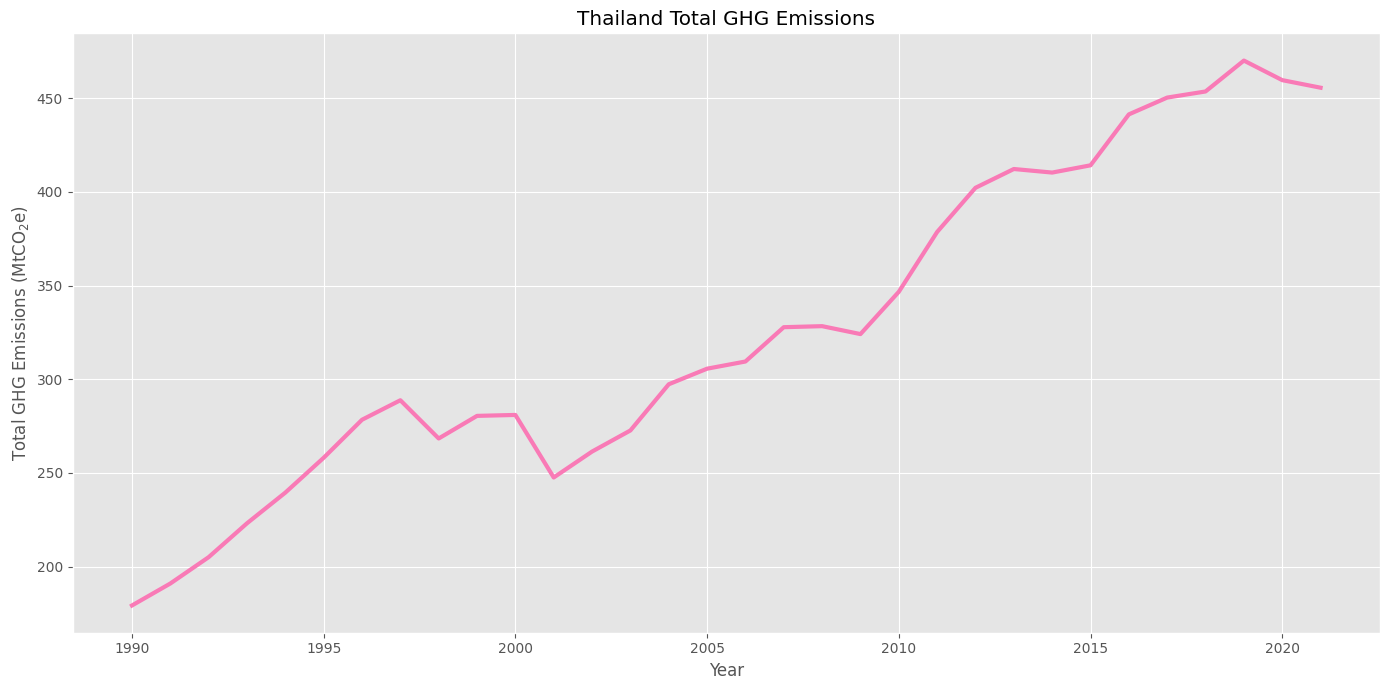

In [51]:
# prompt: plot กราฟ เอาทุก sector รวมกันเป็น trend รวม

# Assuming df_transposed is your DataFrame after transformations
# If not, replace with the correct DataFrame variable

# Select relevant columns for plotting
plot_df = df_transposed[['Year', 'Agriculture', 'Bunker Fuels', 'Energy', 'Industrial Processes', 'Land-Use Change and Forestry', 'Waste']]

# Convert 'Year' column to numeric if it's not already
plot_df['Year'] = pd.to_numeric(plot_df['Year'], errors='coerce')

# Remove rows with invalid 'Year' values
plot_df = plot_df.dropna(subset=['Year'])

# Calculate the sum of emissions across all sectors for each year
plot_df['Total GHG Emissions'] = plot_df[['Agriculture', 'Bunker Fuels', 'Energy', 'Industrial Processes', 'Land-Use Change and Forestry', 'Waste']].sum(axis=1)


# Create the plot
plt.figure(figsize=(14, 7))

# Plot the total emissions trend
plt.plot(plot_df['Year'], plot_df['Total GHG Emissions'], label='Total GHG Emissions', color='#F97AB6', linewidth=3)


# Customize the plot
plt.xlabel('Year')
plt.ylabel('Total GHG Emissions (MtCO$_2$e)')
plt.title('Thailand Total GHG Emissions')
#plt.legend()
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


3.2 ปริมาณการปล่อยก๊าซเรือนกระจกของประเทศไทย ตั้งแต่ 1991-2021 แยกตามภาคส่วน

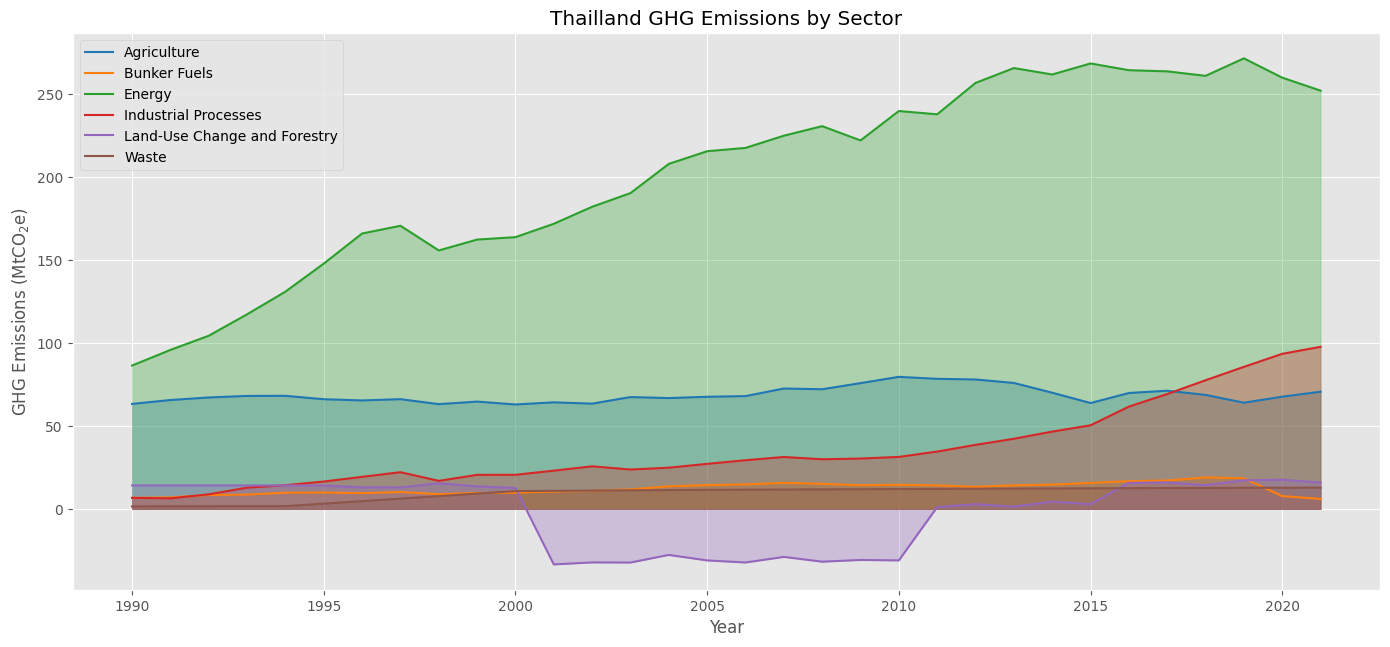

In [52]:
# Ensure that all columns being plotted are numeric
plot_df[['Agriculture', 'Bunker Fuels', 'Energy', 'Industrial Processes', 'Land-Use Change and Forestry', 'Waste']] = plot_df[['Agriculture', 'Bunker Fuels', 'Energy', 'Industrial Processes', 'Land-Use Change and Forestry', 'Waste']].apply(pd.to_numeric, errors='coerce')

# Remove rows with NaN values in emission columns
plot_df = plot_df.dropna(subset=['Agriculture', 'Bunker Fuels', 'Energy', 'Industrial Processes', 'Land-Use Change and Forestry', 'Waste'])

# Create the plot
plt.figure(figsize=(14, 7))

# Plot each sector's emissions with shaded areas under each line
plt.plot(plot_df['Year'], plot_df['Agriculture'], label='Agriculture', color='tab:blue')
plt.fill_between(plot_df['Year'], plot_df['Agriculture'], color='tab:blue', alpha=0.3)  # Shaded area

plt.plot(plot_df['Year'], plot_df['Bunker Fuels'], label='Bunker Fuels', color='tab:orange')
plt.fill_between(plot_df['Year'], plot_df['Bunker Fuels'], color='tab:orange', alpha=0.3)  # Shaded area

plt.plot(plot_df['Year'], plot_df['Energy'], label='Energy', color='tab:green')
plt.fill_between(plot_df['Year'], plot_df['Energy'], color='tab:green', alpha=0.3)  # Shaded area

plt.plot(plot_df['Year'], plot_df['Industrial Processes'], label='Industrial Processes', color='tab:red')
plt.fill_between(plot_df['Year'], plot_df['Industrial Processes'], color='tab:red', alpha=0.3)  # Shaded area

plt.plot(plot_df['Year'], plot_df['Land-Use Change and Forestry'], label='Land-Use Change and Forestry', color='tab:purple')
plt.fill_between(plot_df['Year'], plot_df['Land-Use Change and Forestry'], color='tab:purple', alpha=0.3)  # Shaded area

plt.plot(plot_df['Year'], plot_df['Waste'], label='Waste', color='tab:brown')
plt.fill_between(plot_df['Year'], plot_df['Waste'], color='tab:brown', alpha=0.3)  # Shaded area

# Customize the plot
plt.xlabel('Year')
plt.ylabel('GHG Emissions (MtCO$_2$e)')
plt.title('Thailland GHG Emissions by Sector')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability if needed

# Adjust layout to add more space under the graph
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Add space below the graph

# Show the plot
plt.show()

# 4. ภาพรวมปริมาณการใช้ไฟฟ้าและปริมาณการผลิตไฟฟ้าของประเทศไทย ในช่วง2014-2024

4.1 ภาพรวมปริมาณการใช้ไฟฟ้าในช่วงปี 2014-2024 (10 ปี)

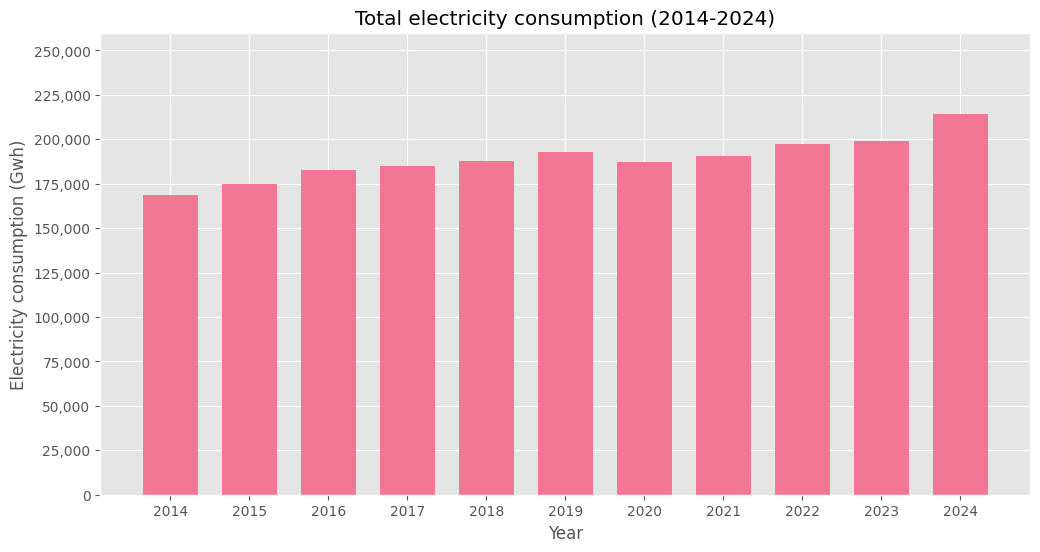

,Quantity
Year,
2014,168685.385828
2015,174833.113528
2016,182847.430533
2017,185124.053297
2018,187831.859157
2019,192960.434920
2020,187046.481455
2021,190468.055952
2022,197208.839504


<Figure size 640x480 with 0 Axes>

In [27]:
# เลือกเฉพาะ row ที่มี Year 2014-2024
df_consumption_filtered = df_consumption[(df_consumption['Year'] >= 2014) & (df_consumption['Year'] <= 2024)]

# รวม Quantity ของแต่ละปี
quantity_by_year = df_consumption_filtered.groupby('Year')['Quantity'].sum()

# สร้างกราฟแท่ง
plt.figure(figsize=(12, 6))
plt.bar(quantity_by_year.index, quantity_by_year.values, width = 0.7, color='#f27794')
plt.xlabel('Year')
plt.ylabel('Electricity consumption (Gwh)')
plt.title('Total electricity consumption (2014-2024)')
plt.ylim(0, 260000)  # ปรับช่วงแกน Y ให้เริ่มที่ 0 และสิ้นสุดที่ 260,000
plt.xticks(np.arange(2014, 2025, 1))  # ให้แกน X แสดงเฉพาะปี 2014, 2016, 2018, ... 2024
plt.yticks(np.arange(0, 260000, 25000))  # ให้แกน Y ค่าเริ่มต้นที่ 0 ไปจนถึงต่ำกว่า 260,000 โดย เพิ่มครั้งละ 19,500
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

# แสดงผลรวม Quantity ของแต่ละปี
display(quantity_by_year)

#เซฟกราฟที่สร้างใน fig
save_path = "/content/drive/MyDrive/github-images"
plt.savefig(f"{save_path}/figure3.png", dpi=300, bbox_inches='tight')


4.2 ภาพรวมปริมาณการผลิตไฟฟ้าในช่วงปี 2014-2024 (10 ปี)

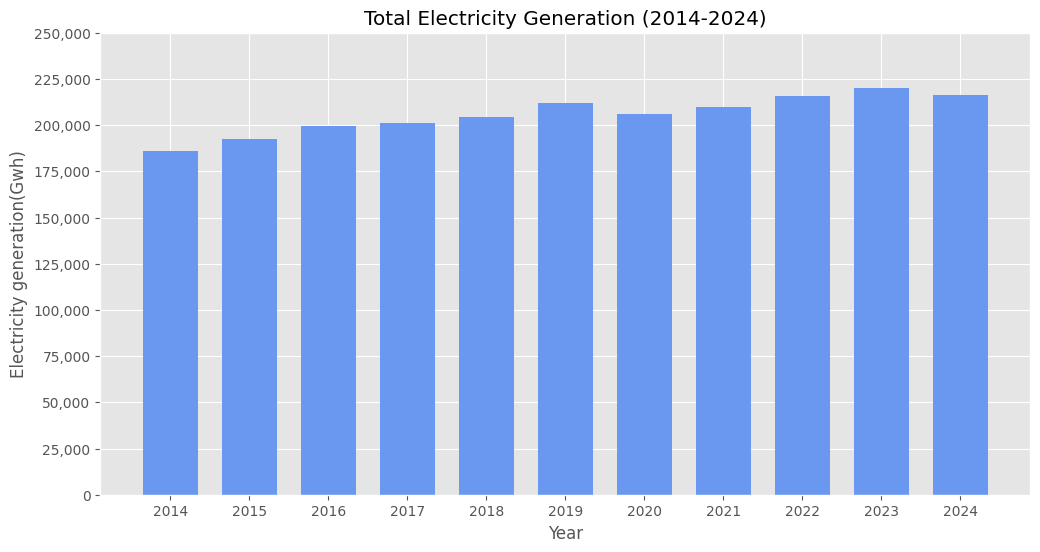

,Quantity
Year,
2014,186023.894934
2015,192246.425771
2016,199653.879078
2017,201165.540637
2018,204427.996280
2019,212049.680911
2020,205995.327945
2021,209716.771202
2022,215837.842977


In [28]:
# เลือกเฉพาะ row ที่มี Year 2014-2024
df_generation_filtered = df_generation[(df_generation['Year'] >= 2014) & (df_generation['Year'] <= 2024)]

# รวม Quantity ของแต่ละปี
quantity_by_year = df_generation_filtered.groupby('Year')['Quantity'].sum()

# สร้างกราฟแท่ง
plt.figure(figsize=(12, 6))
plt.bar(quantity_by_year.index, quantity_by_year.values, width = 0.7, color='#6a98f1')
plt.xlabel('Year')
plt.ylabel('Electricity generation(Gwh)')
plt.title('Total Electricity Generation (2014-2024)')
plt.ylim(0, 250000)  # ปรับช่วงแกน Y ให้เริ่มที่ 0 และสิ้นสุดที่ 250,000
plt.xticks(np.arange(2014, 2025, 1))  # ให้แกน X แสดงเฉพาะปี 2014, 2016, 2018, ... 2024
plt.yticks(np.arange(0, 260000, 25000))  # ให้แกน Y ค่าเริ่มต้นที่ 0 ไปจนถึงต่ำกว่า 250,000 โดย เพิ่มครั้งละ 20,000
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

# แสดงผลรวม Quantity ของแต่ละปี
display(quantity_by_year)

4.3 เปรียบเทียบภาพรวมการใช้ไฟฟ้าและการผลิตไฟฟ้าในช่วง 2014-2024 (10 ปี)

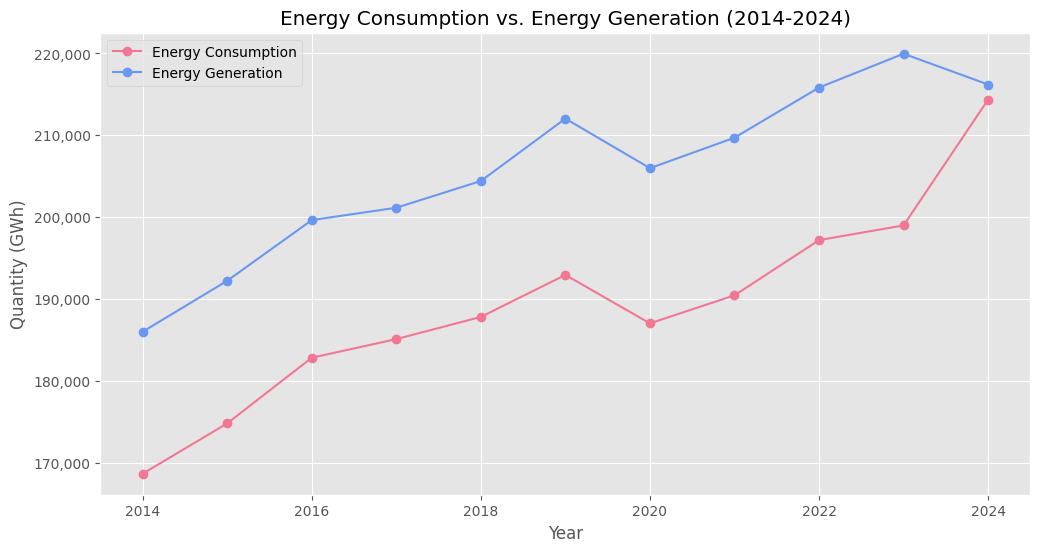

In [29]:
consumption_by_year = df_consumption_filtered.groupby('Year')['Quantity'].sum()
generation_by_year = df_generation_filtered.groupby('Year')['Quantity'].sum()

# สร้างกราฟเส้น
plt.figure(figsize=(12, 6))
plt.plot(consumption_by_year.index, consumption_by_year.values, label='Energy Consumption', marker='o',color = '#f27794')
plt.plot(generation_by_year.index, generation_by_year.values, label='Energy Generation', marker='o',color = '#6a98f1')
plt.xlabel('Year')
plt.ylabel('Quantity (GWh)')
plt.title('Energy Consumption vs. Energy Generation (2014-2024)')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

# 5. Graph การใช้ไฟฟ้าในช่วงปี 2014-2024 (10 ปี)

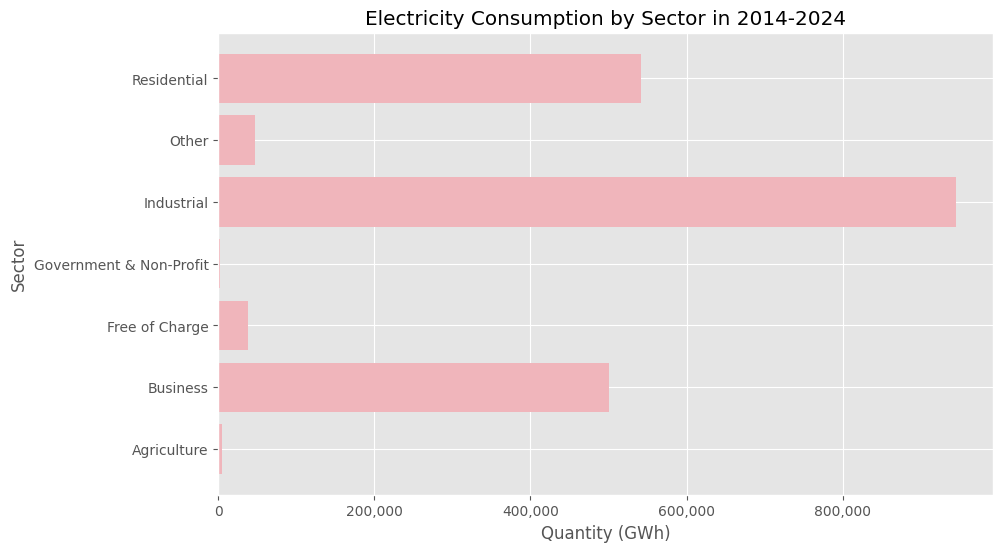

In [30]:
# รวม Quantity ของแต่ละ Sector ในปี 2014
quantity_by_sector = df_consumption_filtered.groupby('Sector')['Quantity'].sum()

# สร้างกราฟแท่งแนวนอน
plt.figure(figsize=(10, 6))
bars = plt.barh(quantity_by_sector.index, quantity_by_sector.values, color='#f0b5bb')


plt.xlabel('Quantity (GWh)')
plt.ylabel('Sector')
plt.title('Electricity Consumption by Sector in 2014-2024')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [31]:
# รวม Quantity ของแต่ละ Sector ในแต่ละปี
quantity_by_sector_year = df_consumption_filtered.groupby(['Year', 'Sector'])['Quantity'].sum().unstack()

# ตรวจสอบชื่อ column ใน DataFrame
print(quantity_by_sector_year.columns)

Index(['Agriculture', 'Business', 'Free of Charge', 'Government & Non-Profit',
       'Industrial', 'Other', 'Residential'],
      dtype='object', name='Sector')


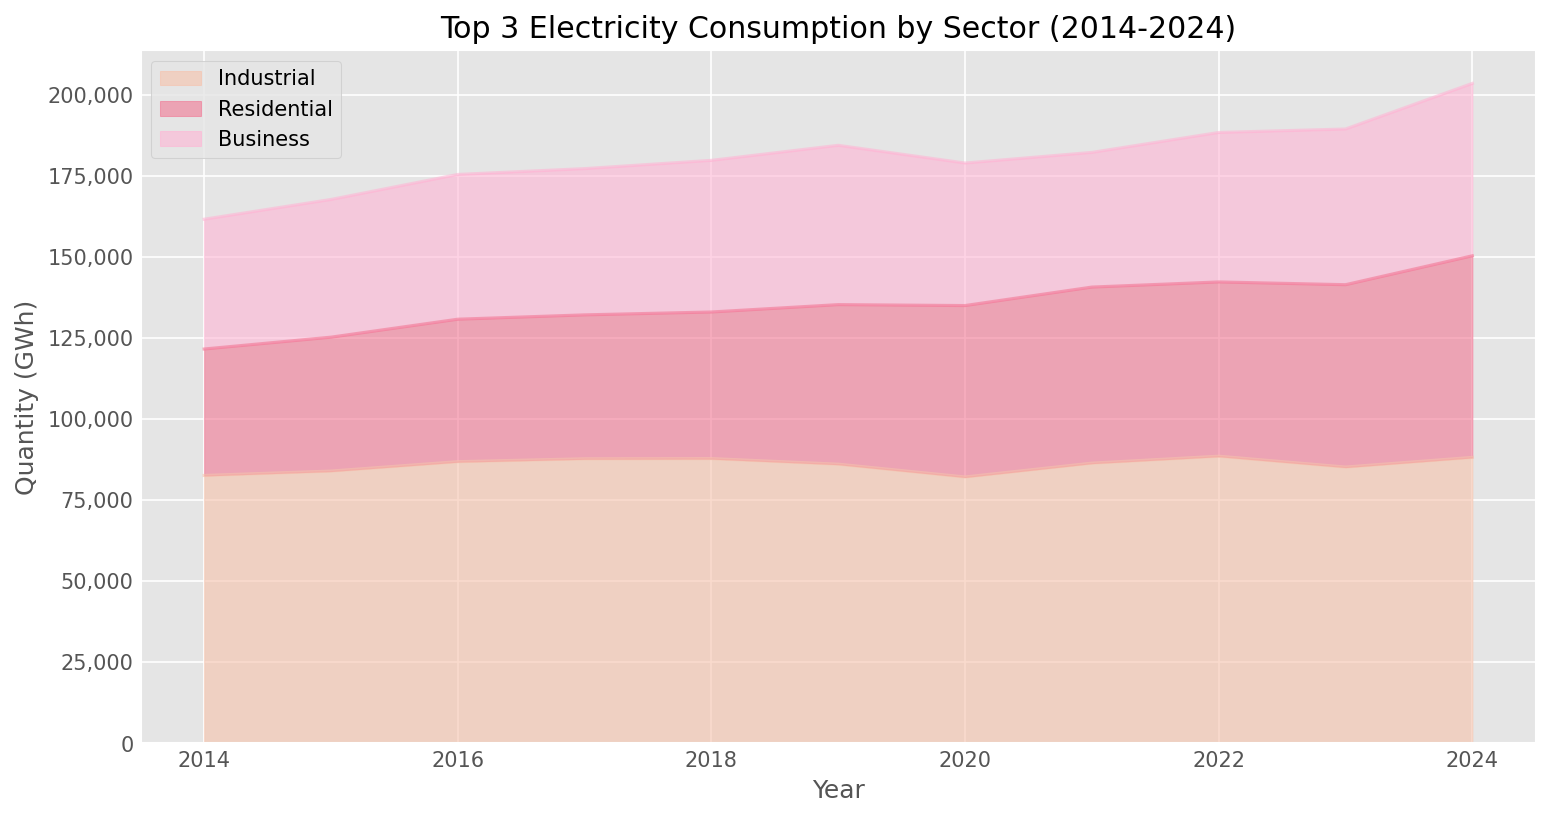

In [32]:
plt.figure(figsize=(12,6),dpi=150)
# Store the current axes in a separated variable
ax = plt.gca()
# Plot
# Default:stacked=False, x=None (use row index), y=None (use all columns)
# เปลี่ยนชื่อ column ใน teams ให้ตรงกับชื่อ column ใน DataFrame
top3 = ['Industrial', 'Residential', 'Business']  # Updated column name
colors = ['#f6c2ac', '#f27794', '#ffb6d5']
quantity_by_sector_year.loc[:, top3].plot( kind='area', stacked=True, alpha=0.6, ax=ax,color=colors )
plt.legend(loc='upper left')        # Set parameters of the legend
plt.ylabel('Quantity (GWh)') # Add label to y-axis
plt.title('Top 3 Electricity Consumption by Sector (2014-2024)')
# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=0, horizontalalignment='center' )

plt.tick_params(axis='both', which='both', length=0)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()


# 5. Graph การผลิตไฟฟ้าในช่วงปี 2014-2024 (10 ปี)

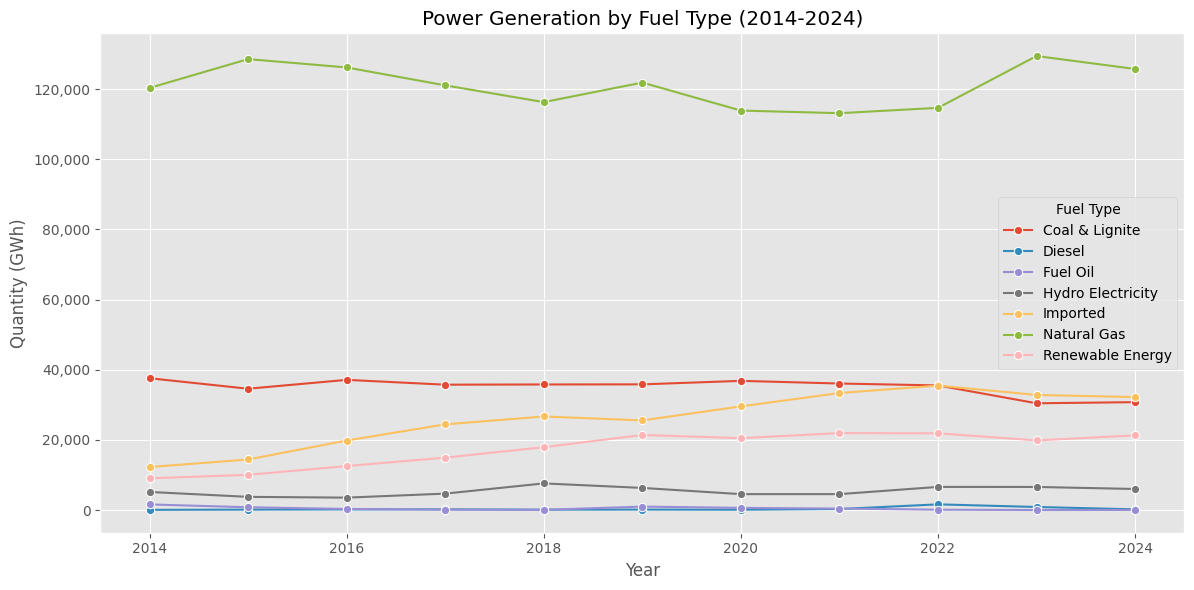

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# รวม Quantity ของแต่ละปี แยกตามชนิดเชื้อเพลิง
quantity_by_fuel_year = df_generation_filtered.groupby(['Year', 'Fuel Type'])['Quantity'].sum().reset_index()

# สร้างกราฟด้วย seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=quantity_by_fuel_year, x='Year', y='Quantity', hue='Fuel Type', marker='o')

plt.xlabel('Year')
plt.ylabel('Quantity (GWh)')
plt.title('Power Generation by Fuel Type (2014-2024)')
plt.grid(True)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()


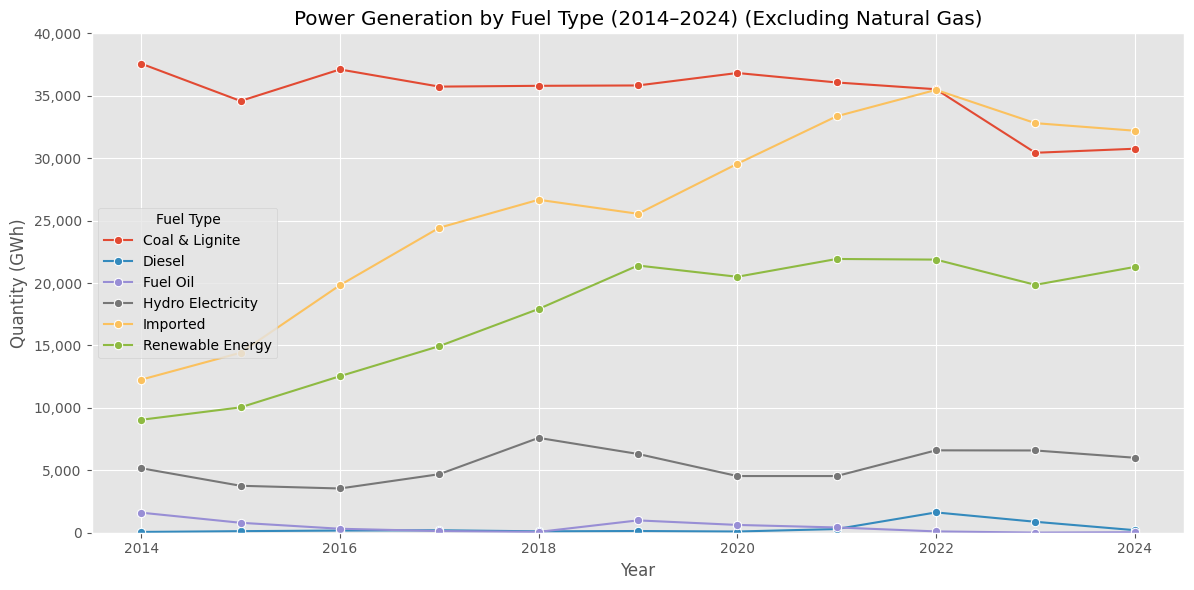

In [34]:
# ตัด Natural Gas ออก เพื่อดูอัตราการเติบโตของส่วนที่เหลือ เนื่องจาก Natural Gas มีสัดส่วนที่แตกต่างจากอันอื่นมาก ทำให้มองเห็นเทรนยาก
# เลือกเฉพาะ row ที่มี Year 2014-2024 และ Fuel Type ไม่ใช่ Natural Gas
df_gen_filtered_cut = df_generation_filtered[
    (df_generation_filtered['Fuel Type'] != 'Natural Gas') &
    (df_generation_filtered['Year'].between(2014, 2024))
]

# รวม Quantity ของแต่ละปี แยกตามชนิดเชื้อเพลิง แล้วหาร 1000 เพื่อแปลงหน่วย
quantity_by_fuel_year = (
    df_gen_filtered_cut
    .groupby(['Year', 'Fuel Type'])['Quantity']
    .sum()
    .reset_index()
)

# แปลงหน่วยเป็นพัน GWh
quantity_by_fuel_year['Quantity'] = quantity_by_fuel_year['Quantity']

# สร้างกราฟด้วย seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=quantity_by_fuel_year,
    x='Year',
    y='Quantity',
    hue='Fuel Type',
    marker='o'
)

plt.xlabel('Year')
plt.ylabel('Quantity (GWh)')
plt.title('Power Generation by Fuel Type (2014–2024) (Excluding Natural Gas)')
plt.ylim(0, 40000)
plt.grid(True)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

# 6. Graph การปล่อย C02 ในช่วงปี 2014-2024 (10 ปี) แยกตามชนิดพลังงาน

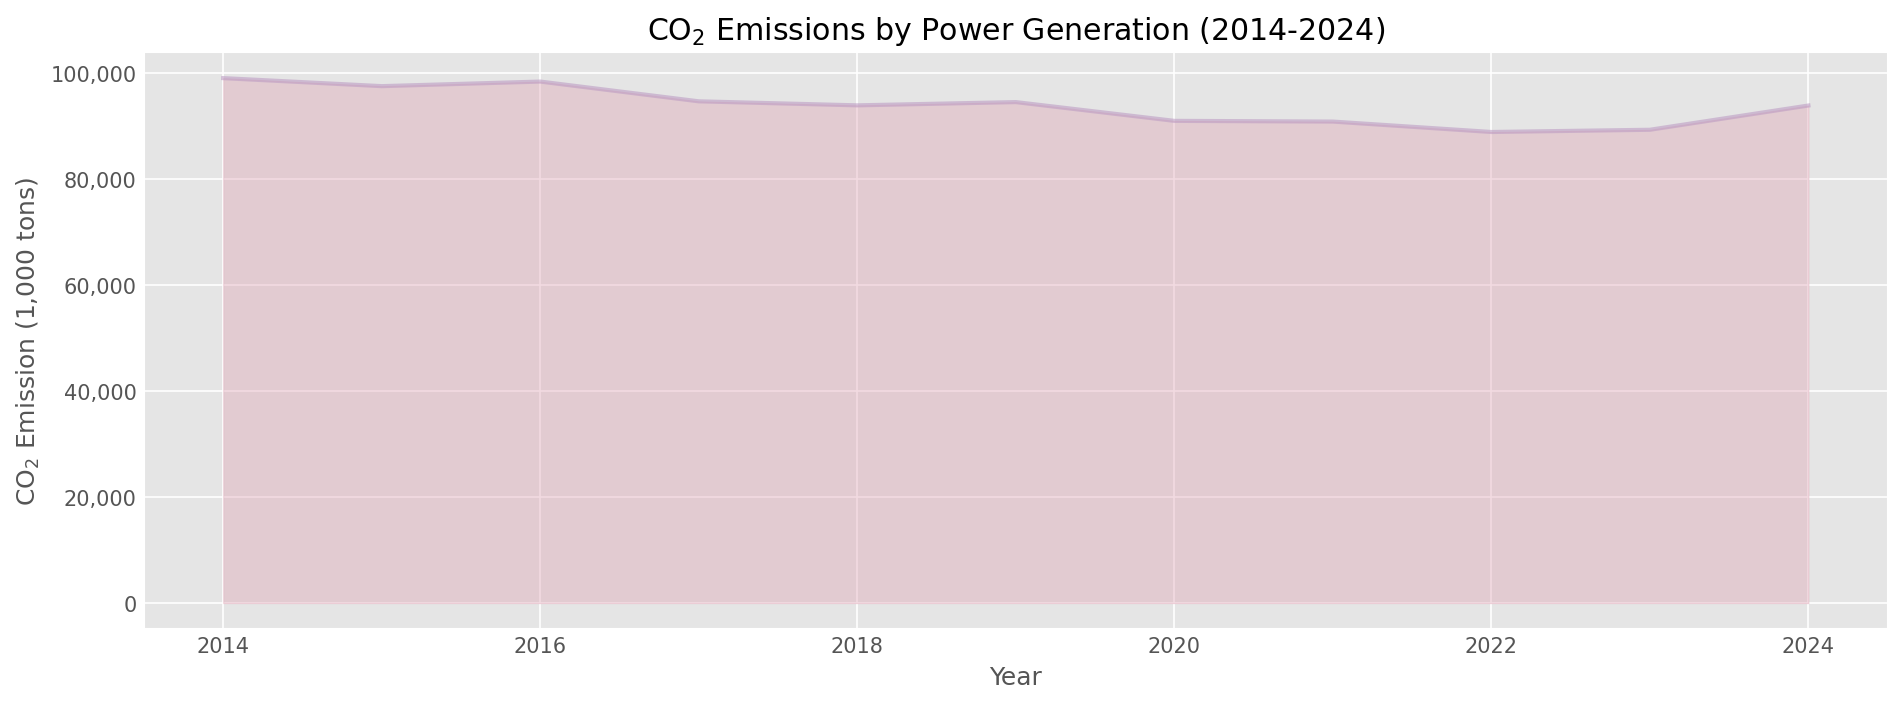

In [35]:
plt.figure(figsize=(15, 5), dpi=150)

plt.fill_between(
    x=df_merged['Year'],
    y1=df_merged['Total-CO2'],
    y2=0,
    color='#dfa4b4',
    alpha=0.4,
)
plt.plot(
    df_merged['Year'],
    df_merged['Total-CO2'],
    color='#bd9dc4',
    alpha=0.6,
    linewidth=2,
)
plt.xlabel("Year")
plt.ylabel("CO$_2$ Emission (1,000 tons)")
plt.title("CO$_2$ Emissions by Power Generation (2014-2024)")
# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp(
    plt.gca().get_xticklabels(),
    rotation=0,
    horizontalalignment='center',
)
#plt.yticks(np.arange(100000, 300001, 50000))
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tick_params(axis='both', which='both', length=0)
plt.show()




In [36]:
df_co2_filtered = df_co2_filtered.set_index('Year')

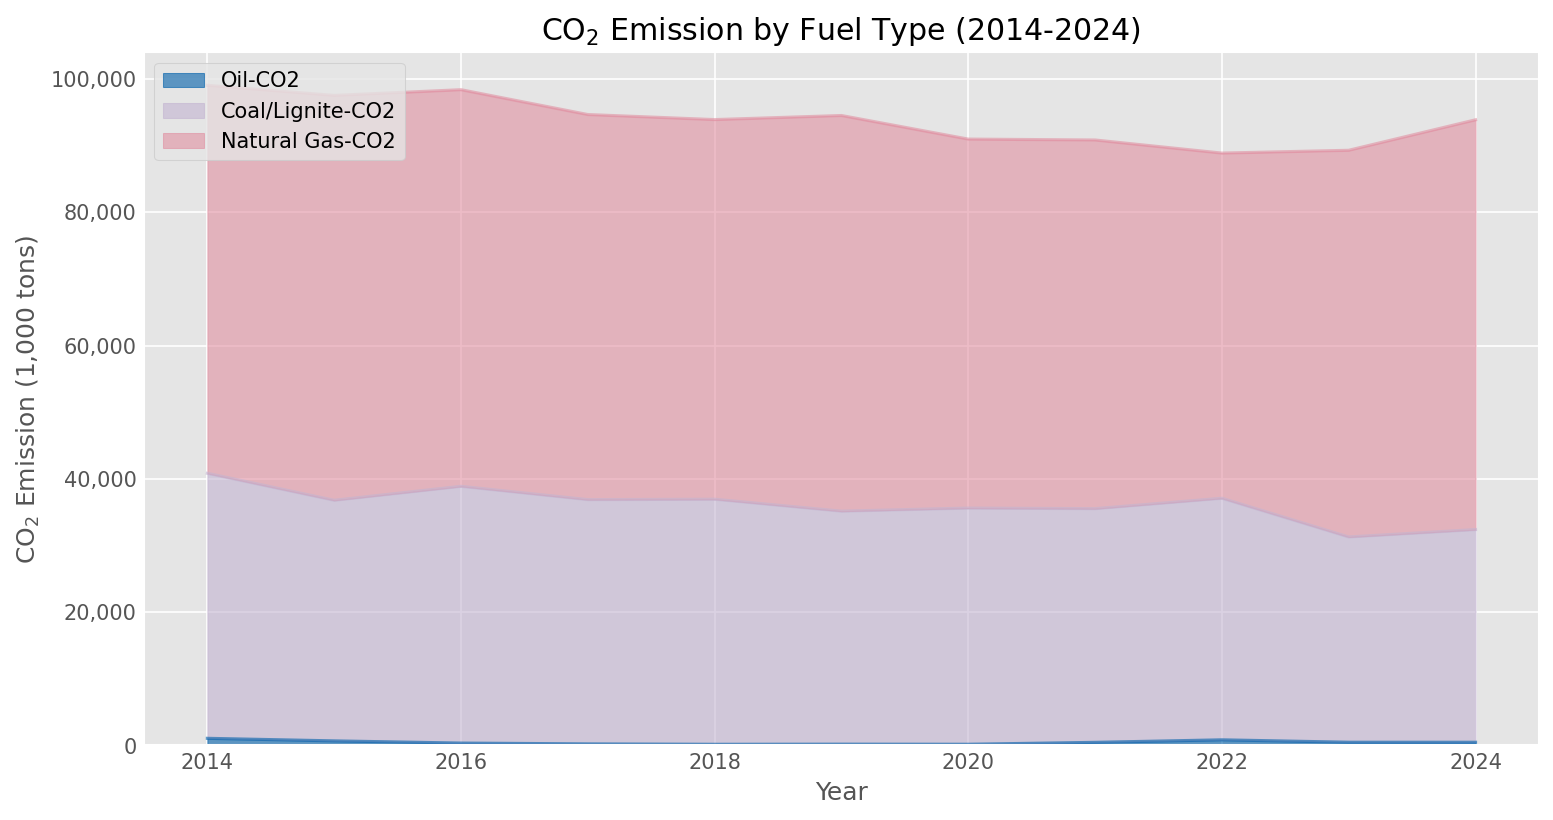

In [37]:
plt.figure(figsize=(12, 6), dpi=150)
# Store the current axes in a separated variable
ax = plt.gca()
top3 = ['Oil-CO2', 'Coal/Lignite-CO2', 'Natural Gas-CO2']
colors = ['#005faa', '#c3b4d1', '#e190a2']
df_co2_filtered.loc[:, top3].plot(kind='area', stacked=True, alpha=0.6, ax=ax, color=colors)
plt.legend(loc='upper left') # Set parameters of the legend
plt.ylabel('CO$_2$ Emission (1,000 tons)')  # Add label to y-axis
plt.xlabel("Year")
plt.title('CO$_2$ Emission by Fuel Type (2014-2024)')
# Rotate labels in x-axis to avoid text overlapping
_ = plt.setp(plt.gca().get_xticklabels(),  # Set one or more properties regarding this artist object
             rotation=0, horizontalalignment='center')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tick_params(axis='both', which='both', length=0)
plt.show()

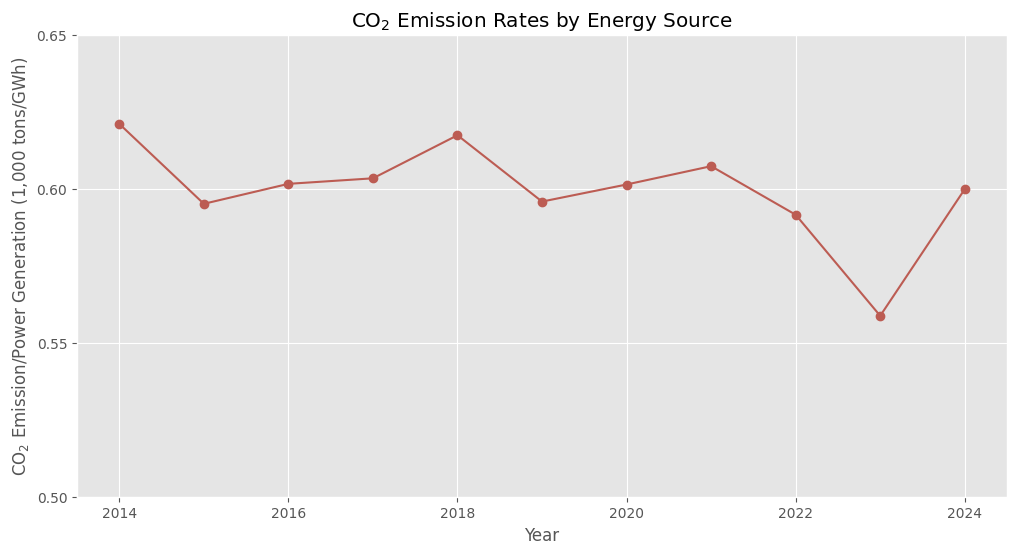

In [38]:
# สร้างกราฟเส้น CO2-Total_perGen เทียบกับ Year
plt.figure(figsize=(12, 6))
plt.plot(df_merged['Year'], df_merged['CO2-Total_perGen'], marker='o',color='#bc5c53')
plt.xlabel('Year')
plt.ylabel('CO$_2$ Emission/Power Generation (1,000 tons/GWh)')
plt.title('CO$_2$ Emission Rates by Energy Source')
plt.grid(True)
plt.yticks(np.arange(0.5, 0.7, 0.05))
plt.show()

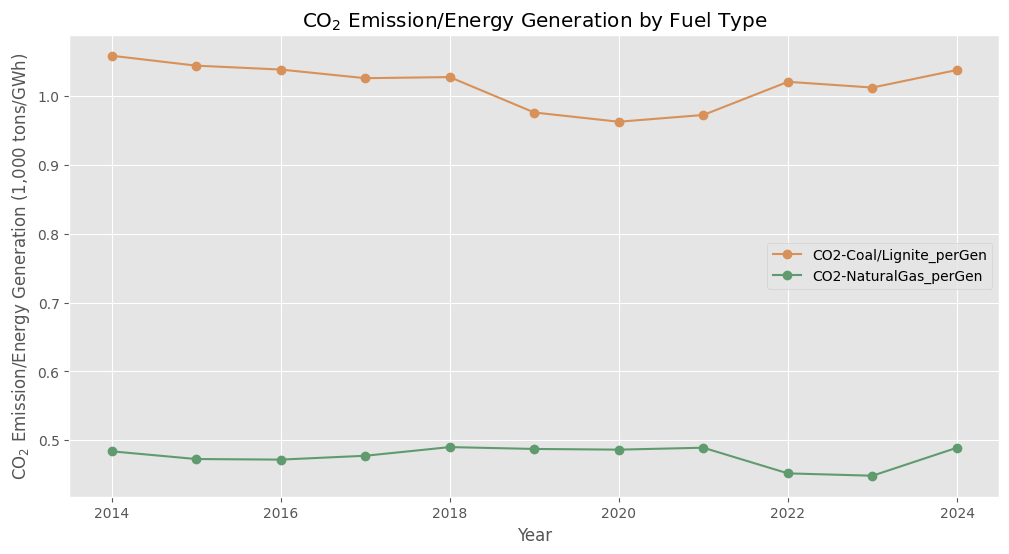

In [39]:
# สร้างกราฟเส้นจาก df_merged โดยแบ่งเส้นตาม CO2-CoalLignite_perGen, CO2-NaturalGas_perGen
plt.figure(figsize=(12, 6))
#plt.plot(df_merged['Year'], df_merged['CO2-Oil_perGen'], marker='o', label='CO2-Oil_perGen')
plt.plot(df_merged['Year'], df_merged['CO2-CoalLignite_perGen'], marker='o', label='CO2-Coal/Lignite_perGen',color='#d79159')
plt.plot(df_merged['Year'], df_merged['CO2-NaturalGas_perGen'], marker='o', label='CO2-NaturalGas_perGen',color='#609b70')
plt.xlabel('Year')
plt.ylabel('CO$_2$ Emission/Energy Generation (1,000 tons/GWh)')
plt.title('CO$_2$ Emission/Energy Generation by Fuel Type')
plt.legend()
plt.grid(True)
plt.show()

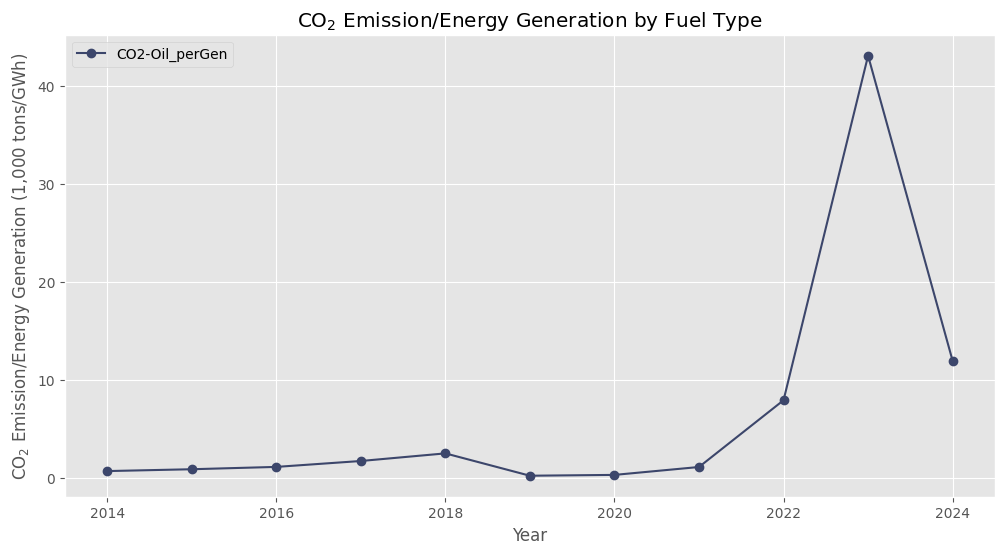

In [40]:
# สร้างกราฟเส้นจาก df_merged เฉพาะ CO2-Oil_perGen
plt.figure(figsize=(12, 6))
plt.plot(df_merged['Year'], df_merged['CO2-Oil_perGen'], marker='o', label='CO2-Oil_perGen',color='#3c466b')
plt.xlabel('Year')
plt.ylabel('CO$_2$ Emission/Energy Generation (1,000 tons/GWh)')
plt.title('CO$_2$ Emission/Energy Generation by Fuel Type')
plt.legend()
plt.grid(True)
plt.show()